In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# displays logos inline within the notebook;
# remove if using a python interpreter instead
%matplotlib inline

# logomaker import
import logomaker

import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("../../data/abasic_sites/AbasicSitesMtDNAcontext_HLcompare.csv", sep=";").sort_values("avgH")
df

,tripletH,origtriH,countH,deepcountH,avgH,tripletL,countL,deepcountL,avgL
9,aCt,aGt,55,93,1.690909,aCt,82,213,2.597561
25,aCa,tGt,56,136,2.428571,aCa,95,257,2.705263
0,tTt,aAa,269,661,2.457249,tTt,88,196,2.227273
41,aCc,gGt,26,64,2.461538,aCc,70,173,2.471429
49,aTg,cAt,143,372,2.601399,aTg,53,135,2.547170
...,...,...,...,...,...,...,...,...,...
23,gAa,tTc,185,3308,17.881081,gAa,114,1065,9.342105
55,gAg,cTc,166,3306,19.915663,gAg,77,912,11.844156
22,cAa,tTg,78,1710,21.923077,cAa,198,1833,9.257576
54,cAg,cTg,96,2185,22.760417,cAg,119,1239,10.411765


In [3]:
df_h = df[["origtriH", "avgH"]]
# df_h = df_h[df_h.avgH > df_h.avgH.mean()]

df_h[0] = df_h.origtriH.str.get(0).str.capitalize()
df_h[1] = df_h.origtriH.str.get(1).str.capitalize()
df_h[2] = df_h.origtriH.str.get(2).str.capitalize()
df_h = df_h.melt(["origtriH", "avgH"], [0, 1, 2], "pos", "nuc")

df_h_wide = df_h.groupby(["pos", "nuc"]).avgH.mean().unstack().fillna(0)
df_h_wide = (df_h_wide.T / df_h_wide.sum(axis=1)).T
df_h_wide

nuc,A,C,G,T
pos,,,,
0,0.196433,0.324619,0.196102,0.282847
1,0.152220,0.330860,0.197539,0.319381
2,0.196601,0.337560,0.360521,0.105318


In [4]:
df_h[df_h.pos == 1].sort_values(["avgH"]).tail(10)#.nuc.value_counts()

,origtriH,avgH,pos,nuc
118,aCc,13.264808,1,C
119,cCc,14.323944,1,C
120,cGc,15.543860,1,G
121,tCg,16.492063,1,C
122,aCg,17.378947,1,C
123,tTc,17.881081,1,T
124,cTc,19.915663,1,T
125,tTg,21.923077,1,T
126,cTg,22.760417,1,T
127,cCg,24.418182,1,C


In [5]:
df_h.sort_values(["origtriH", "pos"]).head(9)

,origtriH,avgH,pos,nuc
2,aAa,2.457249,0,A
66,aAa,2.457249,1,A
130,aAa,2.457249,2,A
26,aAc,5.592179,0,A
90,aAc,5.592179,1,A
154,aAc,5.592179,2,C
15,aAg,4.040268,0,A
79,aAg,4.040268,1,A
143,aAg,4.040268,2,G


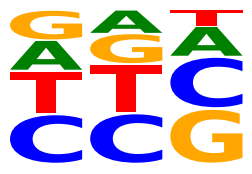

In [6]:
# load ss probability matrix
# ss_df = logomaker.get_example_matrix('ss_probability_matrix',
#                                      print_description=False)

# create Logo object
ss_logo = logomaker.Logo(df_h_wide,
                         width=.9,
                         vpad=.05,
                        #  fade_probabilities=True,
                         stack_order='small_on_top',
                         figsize=[3, 2],
                        #  color_scheme='dodgerblue',
                        #  font_name='Rosewood Std'
)

# style using Logo methods
ss_logo.style_spines(visible=False)

# style using Axes methods
ss_logo.ax.set_xticks(range(len(df_h_wide)))
# ss_logo.ax.set_xticklabels('%+d'%x for x in [-3, -2, -1, 1, 2, 3, 4, 5, 6])
ss_logo.ax.set_xticks([])
ss_logo.ax.set_yticks([])
# ss_logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
# ss_logo.ax.set_ylabel('Frequency')
plt.savefig("../../pictures/abasic_sites/triplet_logo_h.pdf")

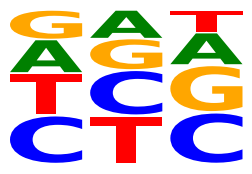

In [9]:
df_l = df[["origtriH", "avgL"]]
df_l[0] = df_l.origtriH.str.get(0).str.capitalize()
df_l[1] = df_l.origtriH.str.get(1).str.capitalize()
df_l[2] = df_l.origtriH.str.get(2).str.capitalize()
df_l = df_l.melt(["origtriH", "avgL"], [0, 1, 2], "pos", "nuc")

df_l_wide = df_l.groupby(["pos", "nuc"]).avgL.mean().unstack()
df_l_wide = (df_l_wide.T / df_l_wide.sum(axis=1)).T


# create Logo object
ss_logo = logomaker.Logo(df_l_wide,
                         width=.9,
                         vpad=.05,
                        #  fade_probabilities=True,
                         stack_order='small_on_top',
                         figsize=[3, 2],
                        #  color_scheme='dodgerblue',
                        #  font_name='Rosewood Std'
)

# style using Logo methods
ss_logo.style_spines(visible=False)

# style using Axes methods
ss_logo.ax.set_xticks(range(len(df_h_wide)))
# ss_logo.ax.set_xticklabels('%+d'%x for x in [-3, -2, -1, 1, 2, 3, 4, 5, 6])
ss_logo.ax.set_xticks([])
ss_logo.ax.set_yticks([])
# ss_logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
# ss_logo.ax.set_ylabel('Frequency')
plt.savefig("../../pictures/abasic_sites/triplet_logo_l.pdf")

In [10]:
df_l[df_l.pos == 1].sort_values(["avgL"]).tail(10)#.nuc.value_counts()

,origtriH,avgL,pos,nuc
122,aCg,7.432432,1,C
116,tCc,8.571429,1,C
119,cCc,8.800000,1,C
125,tTg,9.257576,1,T
123,tTc,9.342105,1,T
120,cGc,9.750000,1,G
126,cTg,10.411765,1,T
118,aCc,10.450980,1,C
127,cCg,10.975000,1,C
124,cTc,11.844156,1,T
